In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [7]:
train = pd.read_csv(('train/train.csv'))
test = pd.read_csv(('test/test.csv'))

# The following two lines determines the number of visible columns and 
#the number of visible rows for dataframes and that doesn't affect the code
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Data Exploration and Analysis
Now we should go further to explore our data to be able to know which features to use and if we can synthesize new features. Now i will show the first 5 rows.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

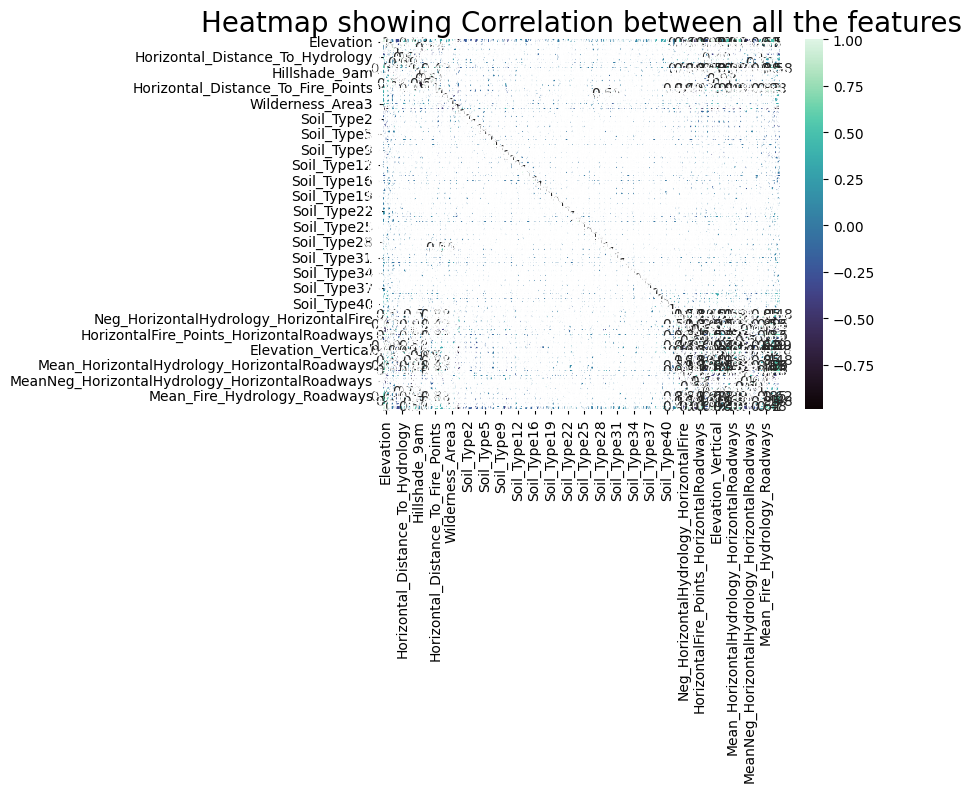

In [53]:
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(train.corr(),annot = True, cmap='mako')

In [ ]:
sns.pairplot(train)

In [ ]:
import seaborn
seaborn.scatterplot(data=train)

In [9]:
print("The number of traning examples(data points) = %i " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 15120 
The number of features we have = 56 


Let's check if any of the columns contains NaNs or Nulls so that we can fill those values if they are insignificant or drop them. We may drop a whole column if most of its values are NaNs or fill its value according to its relation with other columns in the dataframe. Nones can also be 0 in some datasets and that is why i am going to use the describe of the train to see if the range of numbers is not reasonable or not. if you are dropping rows with NaNs and you notice that you need to drop a large portion of your dataset then you should think about filling the NaN values or drop a column that has most of its values missing.

In [10]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [11]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


It seems we don't have any NaN or Null value among the dataset we are trying to classify. Let's now discover the correlation matrix for this dataset and see if we can combine features or drop some according to its correlation with the output labels.

<AxesSubplot:>

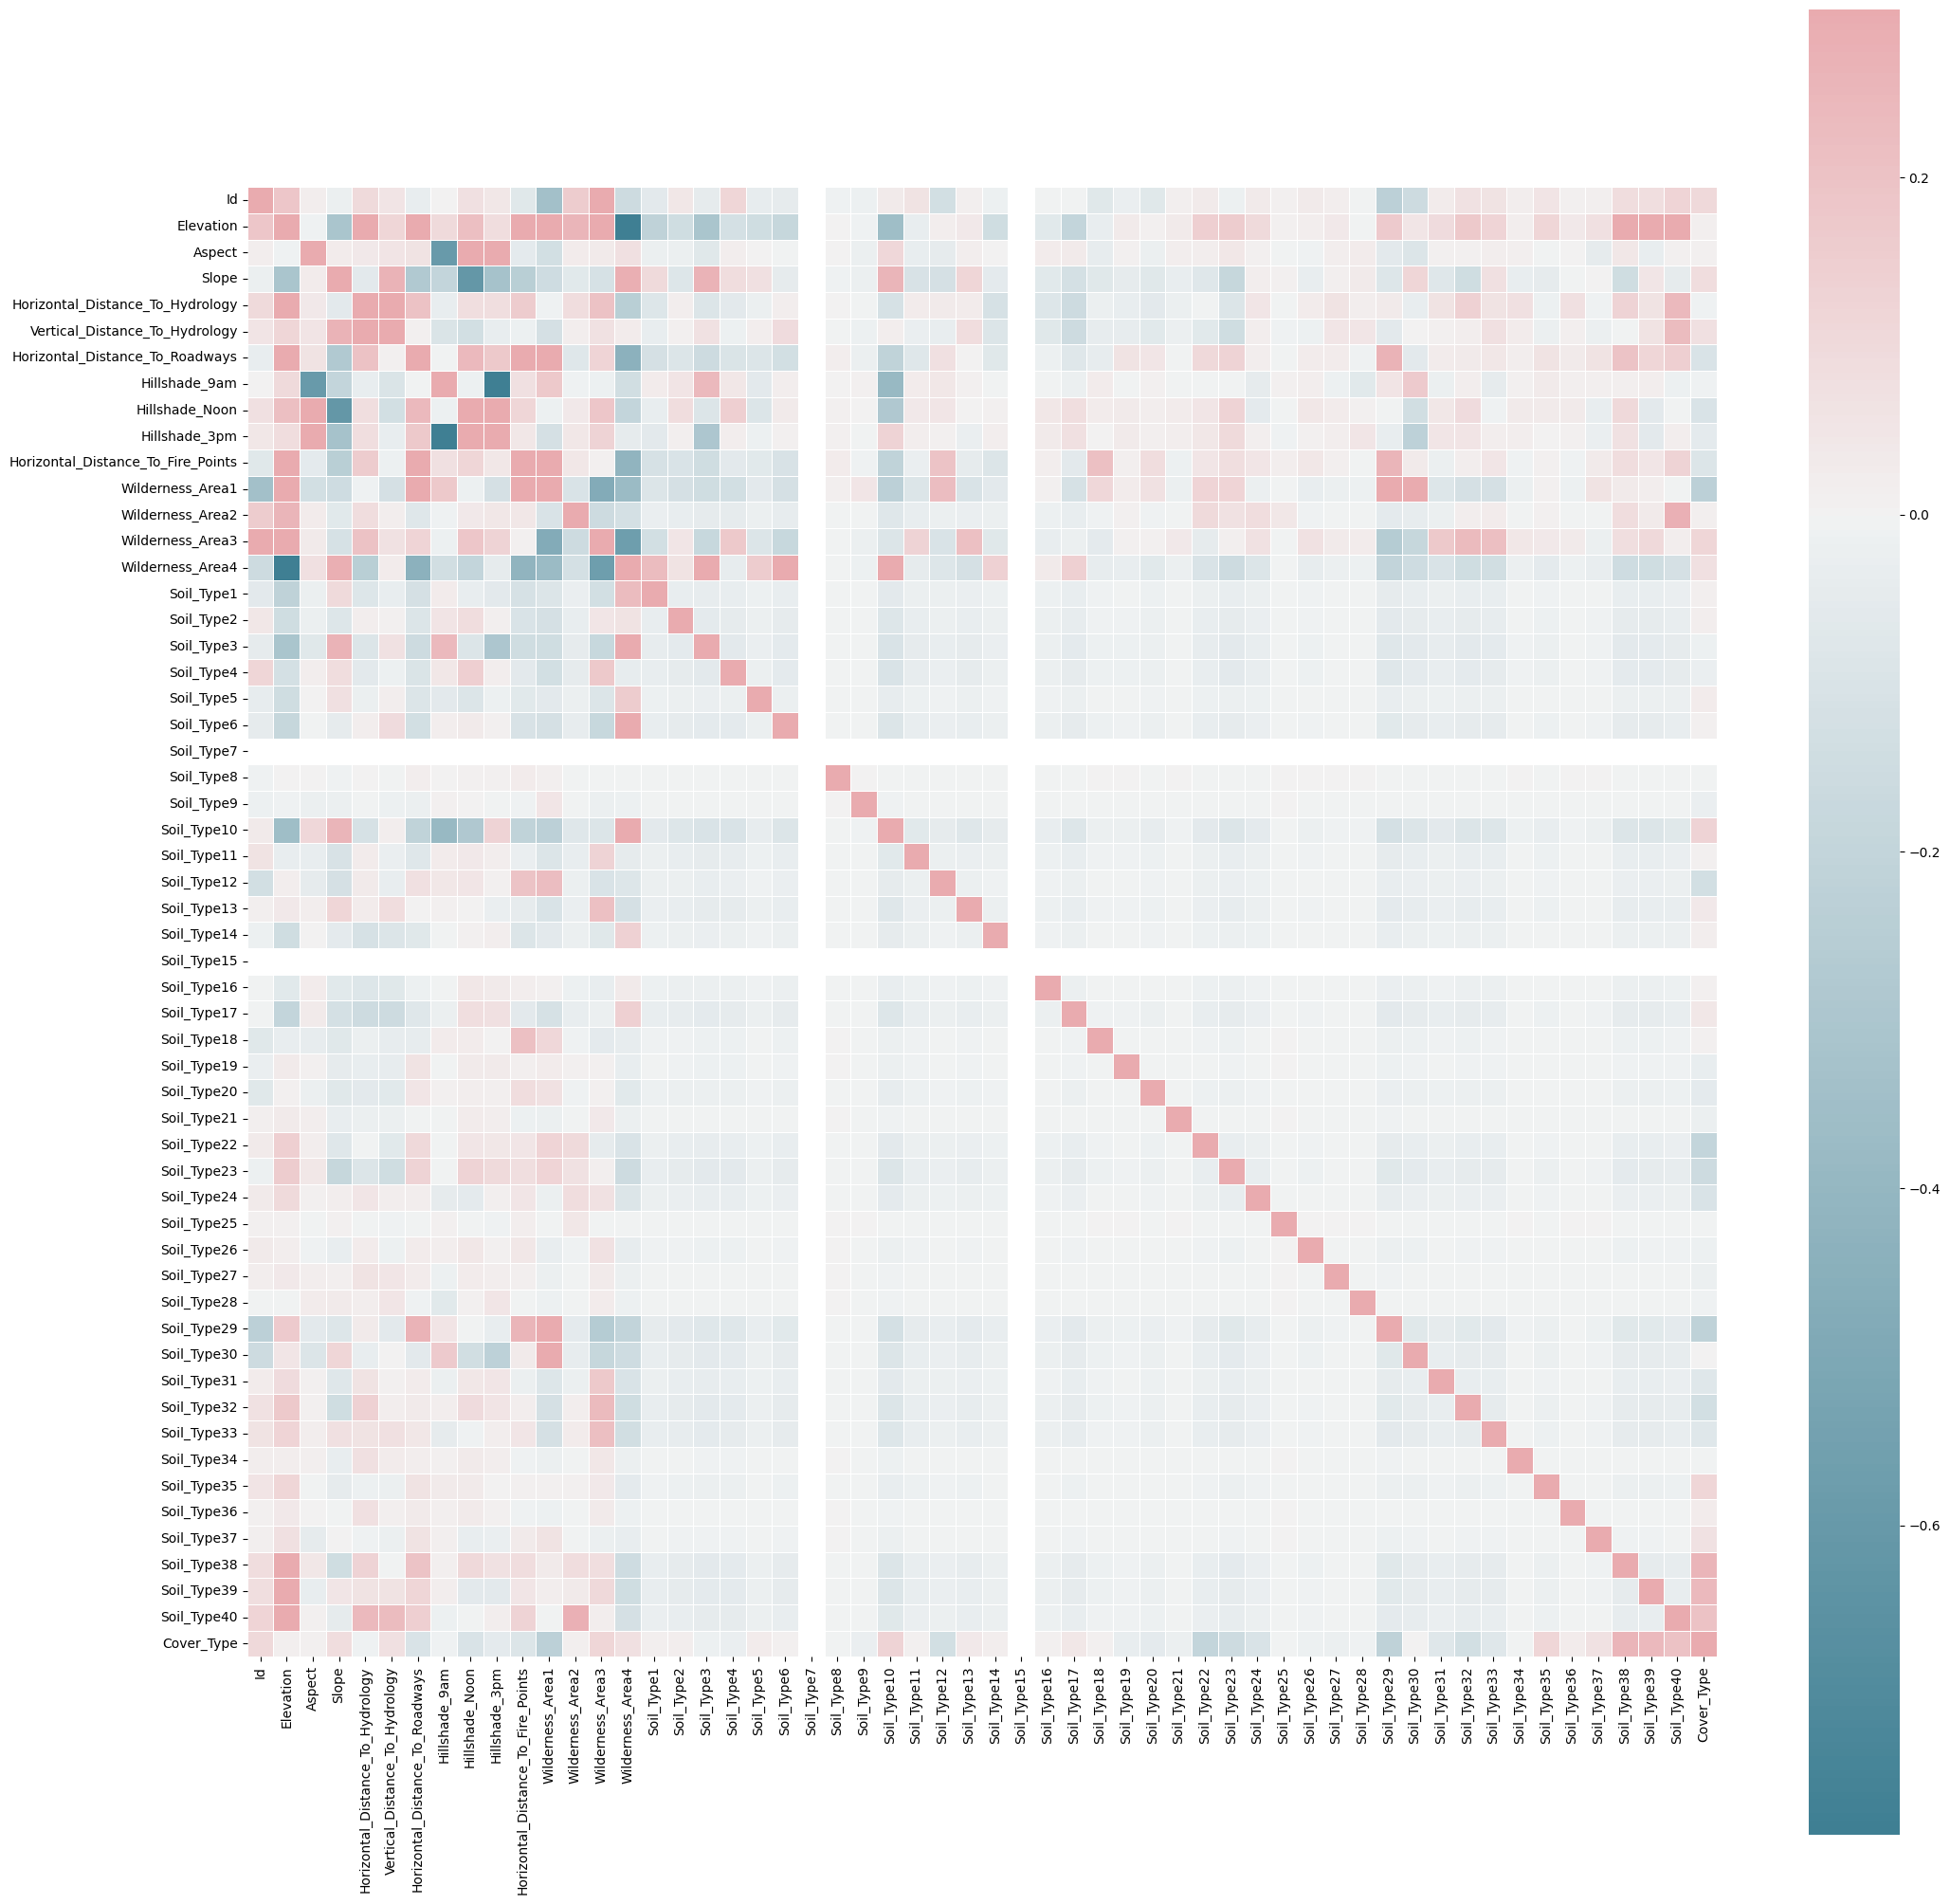

In [12]:
import seaborn as sns


import matplotlib.pyplot as plt


corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [13]:
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,NaN,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,NaN,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,NaN,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,NaN,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,NaN,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,NaN,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,NaN,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,NaN,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,NaN,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,NaN,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,NaN,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,NaN,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

From the above results it seems that soil_Type7 and soil_Type15 doesn't haveany correlation with the output cover_Type so we can easily drop them from the data we have. Also Soil_Type9, Soil_Type36, Soil_Type27, Soil_Type25, Soil_Type8 have weak correlation, but when a feature has a weak correlation tht doesn't mean it is useful cuz combined with other feature it may make a good impact. I choose those columns after experimenting many times with the data i have from the Extratrees, correlation matrix and the heatmap.

In [14]:
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

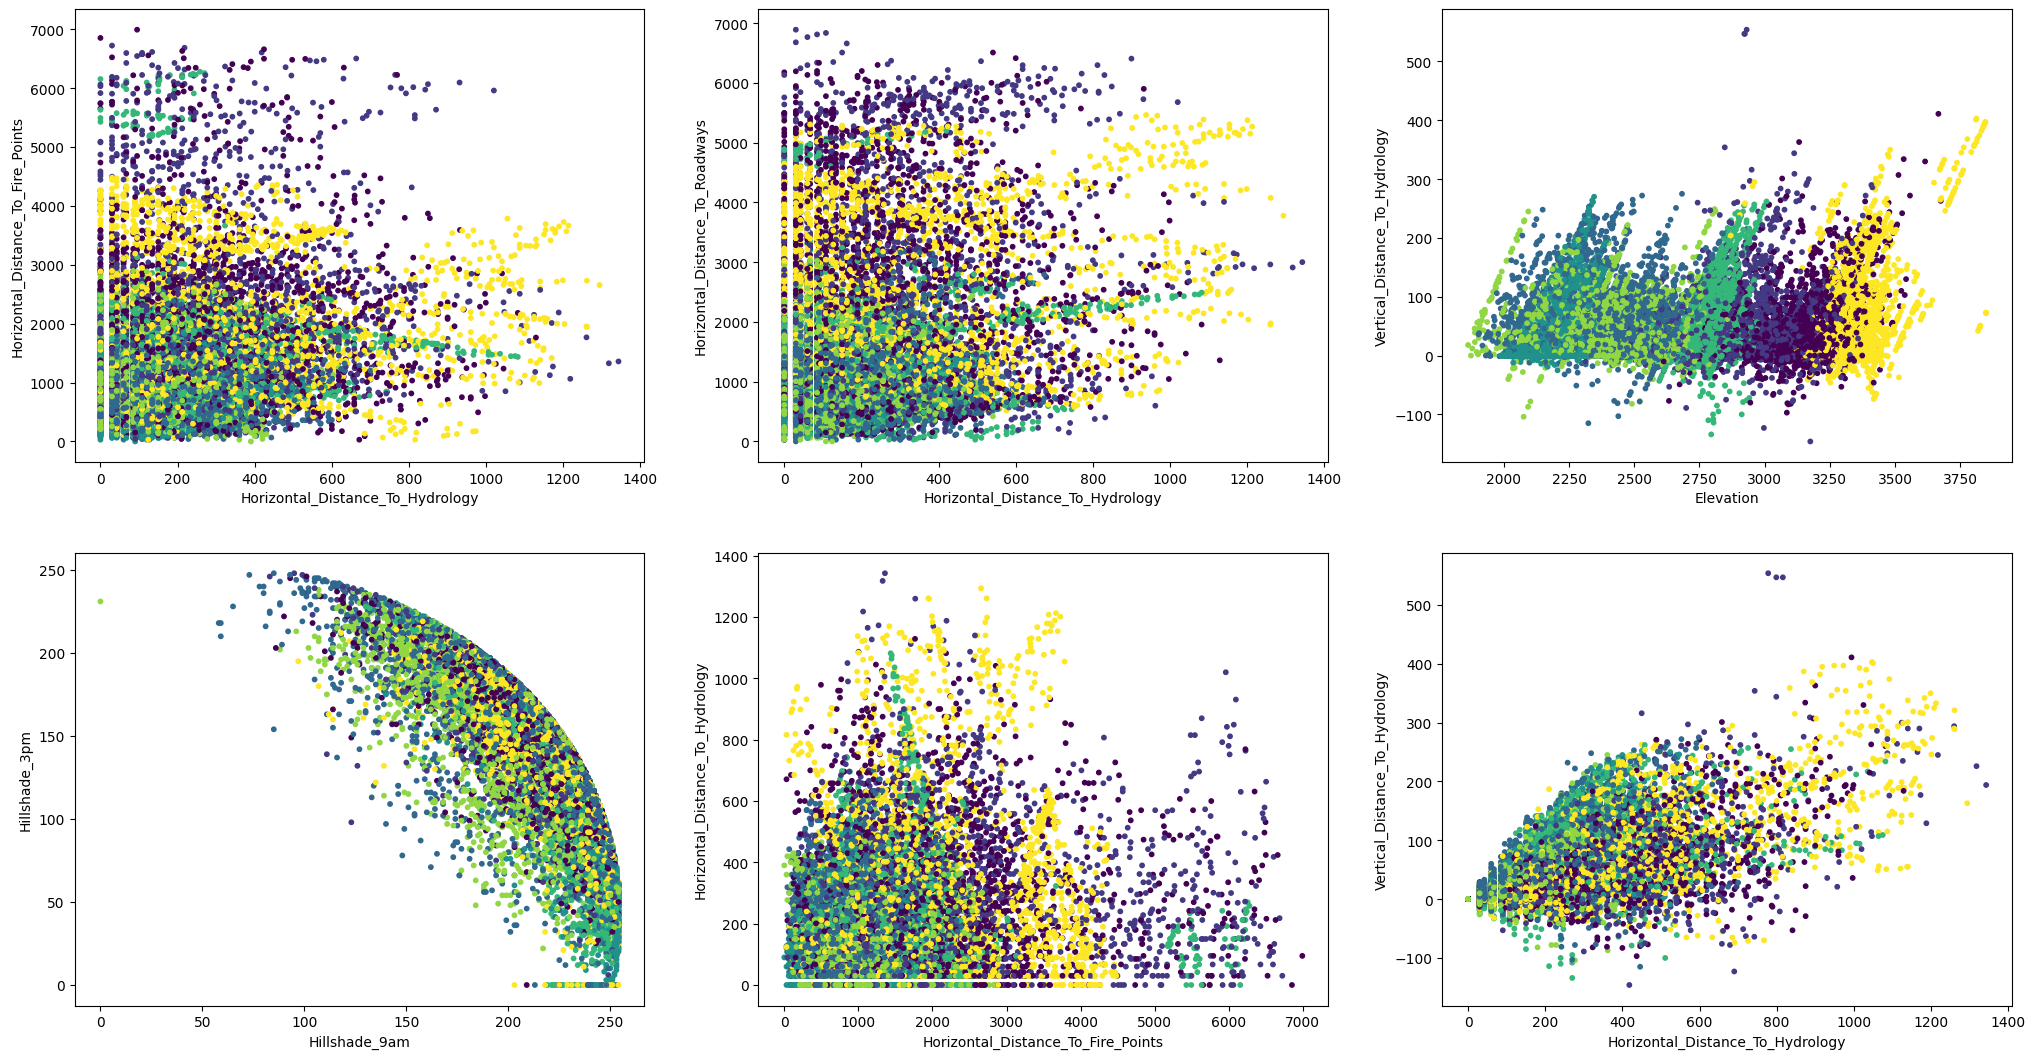

In [15]:
import matplotlib.pyplot as plt
classes = np.array(list(train.Cover_Type.values))

def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Elevation, train.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(train.Hillshade_9am, train.Hillshade_3pm)
f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

Feature Construction¶
As you can see there are some important relations that the model can infere from these new features according to the plots and also the correlation matrix and the heatmap. I will now add these features to the training data and the test data. I have read many resources as this study, this grat course and from that great kernel.

Also it seems that the vertical distance contain some negative number and it gave me better performance when taken the absolute for the column. It is really important to notice that Tree based models only fits vertical and horizontal lines so it is very important to engineer some oblique or tilted features like slope and etc... .

In [16]:
# train.head()
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

Now we should seperate the training set from the labels and name them x and y then we will split them into training and test sets to be able to see how well it would do on unseen data which will give anestimate on how well it will do when testing on Kaggle test data. I will use the convention of using 80% of the data as training set and 20% for the test set.

In [17]:
train.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6537,-6021,768,-252,6789,5769,2596,2596,200.333333,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6437,-6013,602,-178,6615,5835,2596,2584,202.000000,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6389,-5853,3448,-2912,9301,2941,2739,2869,202.333333,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,6453,-5969,3332,-2848,9301,3121,2667,2903,199.333333,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6325,-6019,544,-238,6563,5781,2596,2594,201.333333,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [18]:
from sklearn.model_selection import train_test_split
x = train.drop(['Cover_Type'], axis = 1)
y = train['Cover_Type']
print( y.head() )

x_train, x_test, y_train, y_test = train_test_split( x.values, y.values, test_size=0.05, random_state=42 )

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64


It is important to know if the number of points in the classes are balanced. If the data is skewed then we will not be able to use accuracy as a performance metric since it will be misleading but if it is skewed we may use F-beta score or precision and recall. Precision or recall or F1 score. the choice depends on the problem itself. Where high recall means low number of false negatives , High precision means low number of false positives and F1 score is a trade off between them. You can refere to this article for more about precision 

In [19]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044}  



Feature Selection
Lets now see if the new features we added have any segnificance for the extra tee model or not and how important are our features. We can check that through the Extra trees algorithm which can predict the useful features internally usign "feature_importances"

In [20]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
clf = ExtraTreesClassifier()
clf.fit(x_train,y_train)
# display the relative importance of each attribute
z = clf.feature_importances_
#make a dataframe to display every value and its column name
df = pd.DataFrame()
print(len(z))
print(len(list(x.columns.values)))

df["values"] = z
df['column'] = list(x.columns.values)
# Sort then descendingly to get the worst features at the end
df.sort_values(by='values', ascending=False, inplace = True)
df.head(100)

71
71


,values,column
70,7.515795e-02,Neg_EHyd
58,7.167477e-02,Neg_Elevation_Vertical
0,7.024607e-02,Elevation
59,5.527245e-02,Elevation_Vertical
13,3.552741e-02,Wilderness_Area4
22,2.662679e-02,Soil_Type10
63,2.537580e-02,Mean_HorizontalFire_Points_HorizontalRoadways
56,2.399827e-02,HorizontalFire_Points_HorizontalRoadways
68,2.283898e-02,Mean_Fire_Hydrology_Roadways
5,2.232244e-02,Horizontal_Distance_To_Roadways


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Choosing and Optimizing the Model¶
Now it is time to fit the Extratrees classifier algorithm and for that we will use Scikit learn ExtraTreesClassifier and try to tune the parameters to reach the best performance. For the parameter tuning i will use gridsearchCV from Scikit-Learn to tune the parameters instead of manual tuning. To perform grid search uncomment the commented code and comment the uncommented code in the following cell. Gridsearch is an exhaustive algorithm that tries all combinations of hyperparameters specified in the param_grid,

In [22]:
###### from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#uncomment the commented code and uncomment the commented to perform gridsearchCV
from xgboost import XGBClassifier

clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(x_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

# n_estimators = np.linspace(start = 600 , stop = 1000, num = 8, dtype= int )
# n_estimators = [500, 550, 600, 650, 700, 750, 800 , 850, 900, 950]

# param_grid = {'n_estimators': n_estimators}
# grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
# grid.fit(x_train, y_train)

# print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
# print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test, y_test) * 100 ) )

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.72


In [23]:
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.72


In [24]:
test.head()

id = test['Id']
test.drop(['Id'] , inplace = True , axis = 1)

test = scaler.transform(test)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
#Uncomment the commented code and comment the other line to run the grid search predict

# predictions = grid.best_estimator_.predict(test)
predictions = clf.predict(test)

In [26]:
out = pd.DataFrame()
out['Id'] = id
out['Cover_Type'] = predictions
out.to_csv('my_submission.csv', index=False)
out.head(5)

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [28]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

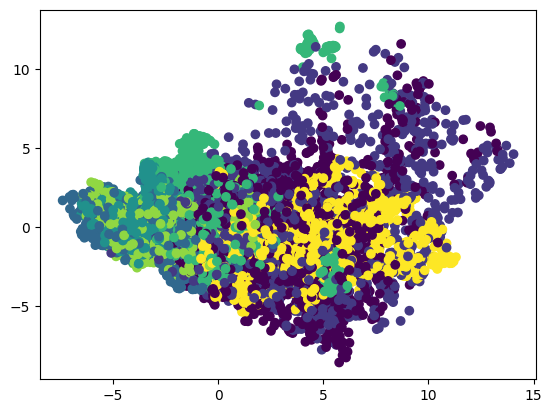

In [29]:
# Visualize the results of PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.show()

In [30]:
# Build the classifier with all features
clf_all = RandomForestClassifier()
clf_all.fit(x_train, y_train)
y_pred_all = clf_all.predict(x_test)

In [31]:
# Build the classifier with reduced features
clf_pca = RandomForestClassifier()
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

In [32]:
# Analyze the performance
print("Performance with all features:")
print(classification_report(y_test, y_pred_all))
print("AUC: ", roc_auc_score(y_test, y_pred_all))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_all))

Performance with all features:
              precision    recall  f1-score   support

           1       0.82      0.78      0.80       113
           2       0.81      0.80      0.80       103
           3       0.93      0.85      0.89       124
           4       0.93      0.97      0.95        89
           5       0.96      0.96      0.96       112
           6       0.87      0.93      0.90        99
           7       0.93      0.98      0.95       116

    accuracy                           0.89       756
   macro avg       0.89      0.90      0.89       756
weighted avg       0.89      0.89      0.89       756



ValueError: multi_class must be in ('ovo', 'ovr')

In [33]:
print("Performance with reduced features:")
print(classification_report(y_test, y_pred_pca))
print("AUC: ", roc_auc_score(y_test, y_pred_pca))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_pca))


Performance with reduced features:
              precision    recall  f1-score   support

           1       0.39      0.42      0.40       113
           2       0.29      0.22      0.25       103
           3       0.33      0.27      0.30       124
           4       0.48      0.57      0.52        89
           5       0.46      0.50      0.48       112
           6       0.31      0.32      0.32        99
           7       0.56      0.59      0.57       116

    accuracy                           0.41       756
   macro avg       0.40      0.41      0.41       756
weighted avg       0.40      0.41      0.41       756



ValueError: multi_class must be in ('ovo', 'ovr')

In [34]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

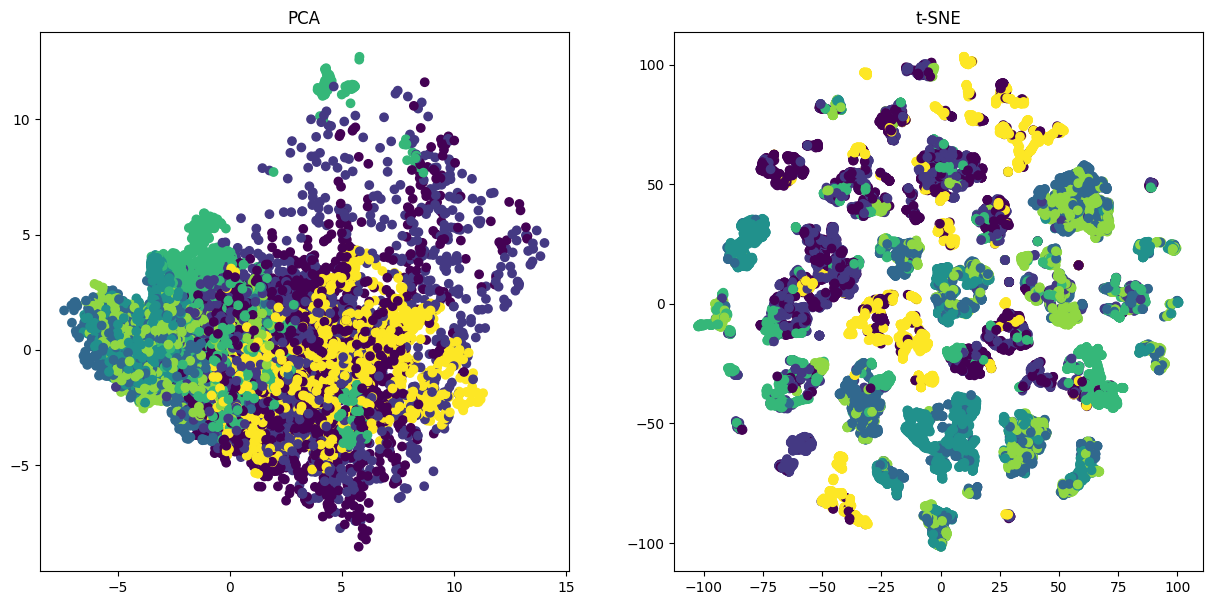

In [38]:
# Visualize the results of PCA and t-SNE
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
ax[0].set_title('PCA')
ax[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
ax[1].set_title('t-SNE')
plt.show()

In [40]:
# Build the classifiers with all features
clf_all_rf = RandomForestClassifier()
clf_all_rf.fit(x_train, y_train)
y_pred_all_rf = clf_all_rf.predict(x_test)

In [42]:
clf_all_ab = AdaBoostClassifier()
clf_all_ab.fit(x_train, y_train)
y_pred_all_ab = clf_all_ab.predict(x_test)

In [44]:
# Build the classifiers with reduced features (PCA)
clf_pca_rf = RandomForestClassifier()
clf_pca_rf.fit(X_train_pca, y_train)
y_pred_pca_rf = clf_pca_rf.predict(X_test_pca)

In [45]:
clf_pca_ab = AdaBoostClassifier()
clf_pca_ab.fit(X_train_pca, y_train)
y_pred_pca_ab = clf_pca_ab.predict(X_test_pca)

Conclusion

In [47]:
print("Performance with all features:")
print("Random Forest:")
print(classification_report(y_test, y_pred_all_rf))
print("AUC: ", roc_auc_score(y_test, y_pred_all_rf))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_all_rf))

Performance with all features:
Random Forest:
              precision    recall  f1-score   support

           1       0.82      0.79      0.80       113
           2       0.81      0.79      0.80       103
           3       0.95      0.86      0.90       124
           4       0.92      0.97      0.95        89
           5       0.98      0.96      0.97       112
           6       0.88      0.96      0.92        99
           7       0.93      0.99      0.96       116

    accuracy                           0.90       756
   macro avg       0.90      0.90      0.90       756
weighted avg       0.90      0.90      0.90       756



ValueError: multi_class must be in ('ovo', 'ovr')

In [48]:
print("AdaBoost:")
print(classification_report(y_test, y_pred_all_ab))
print("AUC: ", roc_auc_score(y_test, y_pred_all_ab))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_all_ab))

AdaBoost:
              precision    recall  f1-score   support

           1       0.37      0.61      0.46       113
           2       0.36      0.04      0.07       103
           3       0.31      0.03      0.06       124
           4       0.47      0.96      0.63        89
           5       0.41      0.87      0.56       112
           6       0.46      0.53      0.49        99
           7       0.62      0.07      0.12       116

    accuracy                           0.42       756
   macro avg       0.43      0.44      0.34       756
weighted avg       0.43      0.42      0.33       756



ValueError: multi_class must be in ('ovo', 'ovr')

In [50]:
print("Performance with reduced features (PCA):")
print("Random Forest:")
print(classification_report(y_test, y_pred_pca_rf))
print("AUC: ", roc_auc_score(y_test, y_pred_pca_rf))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_pca_rf))

Performance with reduced features (PCA):
Random Forest:
              precision    recall  f1-score   support

           1       0.38      0.42      0.40       113
           2       0.32      0.24      0.27       103
           3       0.35      0.29      0.32       124
           4       0.48      0.62      0.54        89
           5       0.47      0.51      0.49       112
           6       0.34      0.31      0.32        99
           7       0.57      0.59      0.58       116

    accuracy                           0.42       756
   macro avg       0.42      0.43      0.42       756
weighted avg       0.42      0.42      0.42       756



ValueError: multi_class must be in ('ovo', 'ovr')

In [51]:
print("AdaBoost:")
print(classification_report(y_test, y_pred_pca_ab))
print("AUC: ", roc_auc_score(y_test, y_pred_pca_ab))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_pca_ab))

AdaBoost:
              precision    recall  f1-score   support

           1       0.44      0.19      0.26       113
           2       0.22      0.22      0.22       103
           3       0.27      0.44      0.34       124
           4       0.24      0.34      0.28        89
           5       0.33      0.28      0.30       112
           6       0.40      0.04      0.07        99
           7       0.32      0.50      0.39       116

    accuracy                           0.29       756
   macro avg       0.32      0.29      0.27       756
weighted avg       0.32      0.29      0.27       756



ValueError: multi_class must be in ('ovo', 'ovr')